#### Decision Tree
- Decision Tree Classifier
- Decision Tree Regressor

### Decision Tree Classifier
- entropy---measure of randomness or unpredictability
- informatio gain---decrease of entropy
- decision node
- leaf node
- root node
- CART (Classification and regression Trees)

In [4]:
from sklearn.datasets import load_iris
iris=load_iris()

In [5]:
iris.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
import pandas as pd
df=pd.DataFrame(iris.data,columns=iris.feature_names)
df["Target"]=iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [7]:
x=df.iloc[:,0:4]
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [8]:
y=df["Target"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Target, dtype: int32

In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=25)

In [28]:
x_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
10,5.4,3.7,1.5,0.2
33,5.5,4.2,1.4,0.2
78,6.0,2.9,4.5,1.5
27,5.2,3.5,1.5,0.2
121,5.6,2.8,4.9,2.0


In [19]:
x_train.shape

(75, 4)

In [20]:
x_test.shape

(75, 4)

In [29]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [30]:
y_predict=model.predict(x_test)
y_predict

array([0, 1, 2, 1, 2, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 1, 2, 2, 1, 1, 1, 1,
       1, 0, 0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       2])

In [31]:
x_test.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
28,5.2,3.4,1.4,0.2
72,6.3,2.5,4.9,1.5
70,5.9,3.2,4.8,1.8
85,6.0,3.4,4.5,1.6
128,6.4,2.8,5.6,2.1


In [32]:
model.predict([[6.3,2.7,4.9,1.8]])

array([2])

In [33]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_test,y_predict))

0.9777777777777777


In [34]:
print(confusion_matrix(y_test,y_predict))

[[17  0  0]
 [ 0 15  1]
 [ 0  0 12]]


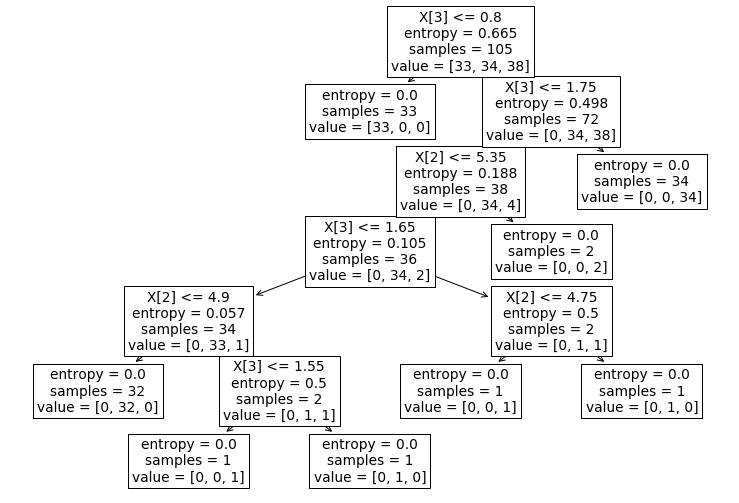

In [36]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(13,9))
tree.plot_tree(model)
plt.show()

In [38]:
# Decision Tree regressor
data=pd.read_csv("headbrain.csv")
data.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [46]:
import matplotlib.pyplot as plt
x=data["Head Size(cm^3)"]   #independent variable
y=data["Brain Weight(grams)"]
y.head()

0    1530
1    1297
2    1335
3    1282
4    1590
Name: Brain Weight(grams), dtype: int64

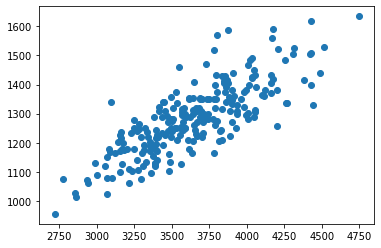

In [45]:
plt.scatter(x,y)

In [62]:
x=data["Head Size(cm^3)"].values
x=x.reshape(-1,1)#independent variable
y=data["Brain Weight(grams)"]
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [50]:
model.predict([[4512]])

array([1530.])

In [52]:
from sklearn.metrics import r2_score
print(model.score(x,y))

0.9553655349263761


In [59]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [60]:
model.score(x,y)

0.639311719957

In [61]:
model.predict([[4512]])

array([1514.16660083])

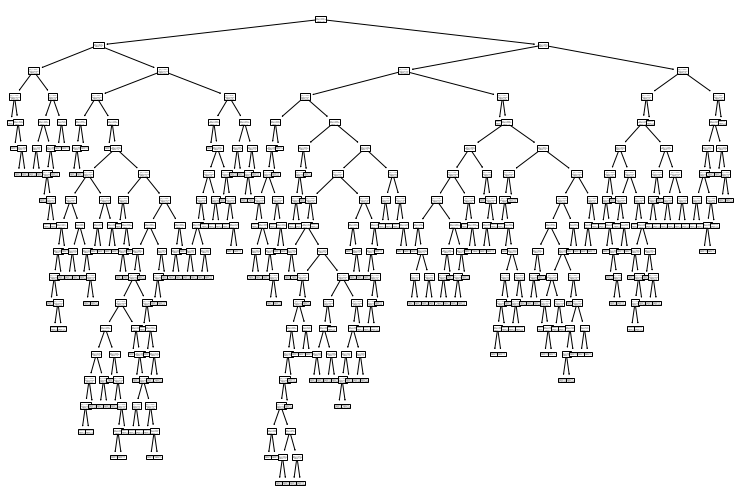

In [63]:
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(13,9))
tree.plot_tree(model)
plt.show()

In [ ]:
actual=['cat','cat','dog','cat','dog']
predicted=['cat','dog','cat','cat','dog']

         predicted
         cat         dog

actual 
cat        2         1

dog        1          2      